In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm.auto import tqdm
from IPython.display import clear_output
from pathlib import Path

from PIL import Image

from registration.first_registration import Align
from models.ransacflow import register_image

Loaded pretrained model from /Users/farhanoktavian/imperial/thesis/sandbox/rf_regist/weights/MegaDepth_Theta1_Eta001_Grad1_0.774.pth


In [13]:
mi = "/Users/farhanoktavian/imperial/thesis/sandbox/regist_eval/dataset/registered_short/HS020/Run06/b_label.png"
si = "/Users/farhanoktavian/imperial/thesis/sandbox/regist_eval/dataset/registered_short/HS020/Run06/b_spectral.png"

mi_img = cv2.imread(mi, cv2.IMREAD_GRAYSCALE)
si_img = cv2.imread(si, cv2.IMREAD_GRAYSCALE)

In [14]:
blank_img = np.zeros_like(si_img)
temp_img = cv2.merge([si_img, blank_img, blank_img])

blank_tgt_img = np.zeros_like(mi_img)
temp_tgt_img = cv2.merge([mi_img, blank_tgt_img, blank_tgt_img])

img = register_image(Image.fromarray(temp_img), Image.fromarray(temp_tgt_img))
img = img[:, :, 0]

# resize img
img = cv2.resize(img, (mi_img.shape[1], mi_img.shape[0]))


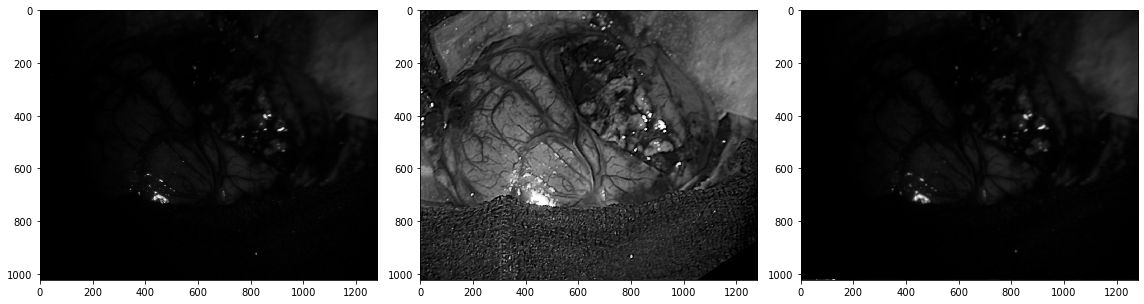

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].imshow(si_img, cmap="gray")
ax[1].imshow(mi_img, cmap="gray")
ax[2].imshow(img, cmap="gray")
plt.tight_layout()
plt.show()


In [16]:
SAVE_DIR = Path("/Users/farhanoktavian/imperial/thesis/sandbox/regist_eval/dataset/registered_short/HS020/Run06/b_fine.png")
cv2.imwrite(str(SAVE_DIR), img)

True